# Assignment: Implementation of Logistic Regression and LinearSVM

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

**Members:** <br>
Baguio, Christian Jay <br>
Bandivas, Roxanne Mae <br>
Barrio, Reyjane Mae <br>
Palmes, Jhibsam <br>
Sabacajan, Cle Michael <br>
Tapao, Mark Vincent

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tabulate import tabulate
from collections import Counter


# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
fruit = pd.read_table("fruit_data_with_colors.txt")

In [9]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [65]:
fruit.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [66]:
fruit.shape

(59, 7)

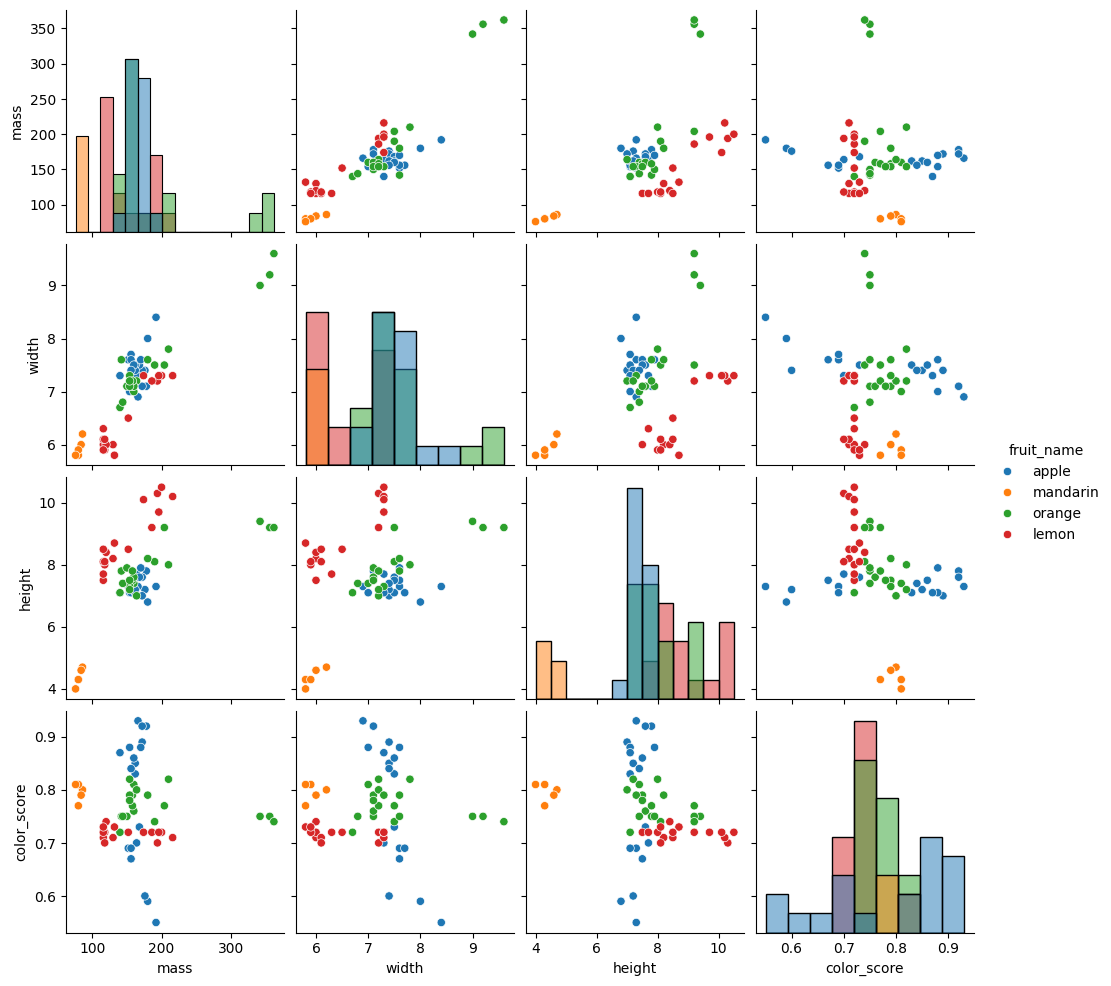

In [67]:
# Pairplot to visualize the data
fruit_without_label = fruit.drop('fruit_label', axis=1)
sns.pairplot(fruit_without_label, hue="fruit_name", diag_kind="hist")


The correlation between the mass and width of each fruit on the plot is plainly visible. In other words, as the fruit's width increases, its mass increases proportionally. Similarly, there is a significant correlation between the "mass" and "height" of each fruit, indicating that the height of the fruit increases proportionally with its mass. Additionally, when we examine the correlation plot of "width" and "height," we can clearly observe that each type of fruit forms distinct clusters. This clustering suggests that the fruits can be effectively categorized based on their dimensions. Overall, the plots demonstrate strong, positive correlations among the dimensions and mass of the fruits, highlighting their interdependence and the potential for classification based on these attributes.

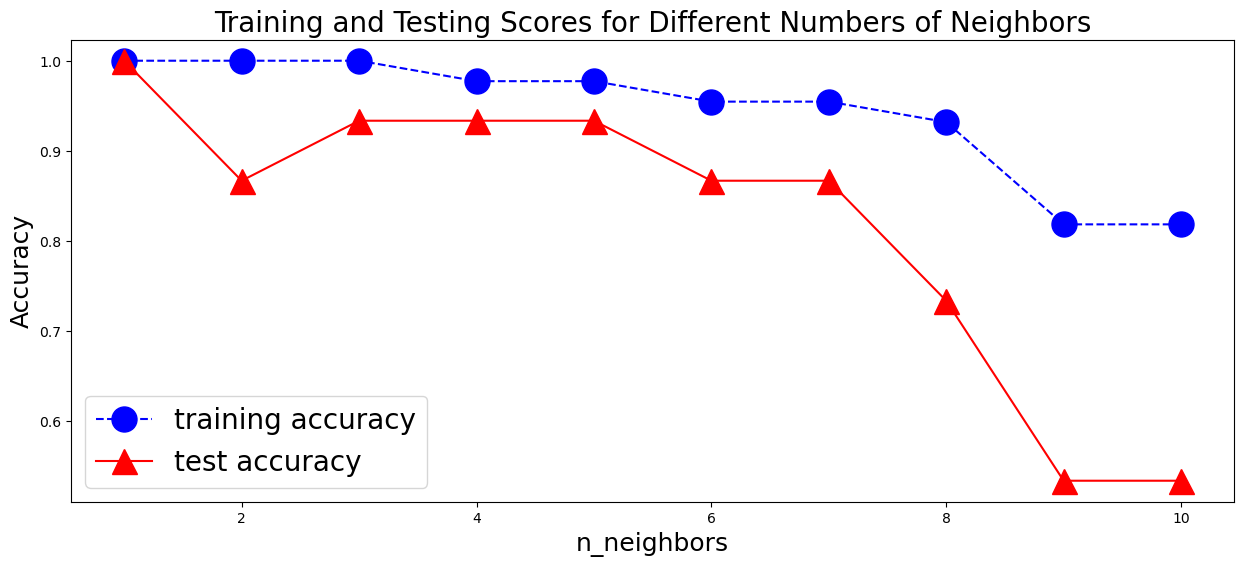

In [10]:
# Ensure all features are numeric
numeric_columns = fruit.select_dtypes(include=[np.number]).columns
X = fruit[numeric_columns].drop('fruit_label', axis=1)
y = fruit['fruit_label']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for seedN in range(1, 30):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=seedN)
    

    # Create a list of neighbors to test
    neighbors_settings = range(1, 11)

    # Initialize arrays to store training and test scores
    knn_training = []
    knn_test = []

    for n in neighbors_settings:
        # Create the KNeighborsClassifier with the given number of neighbors
        knn = KNeighborsClassifier(n_neighbors=n)

        # Fit the model using the training data and training targets
        knn.fit(X_train, y_train)

        # Get the training and testing scores
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)

        # Add the scores to the arrays
        knn_training.append(train_score)
        knn_test.append(test_score)

# Create the plot figure
fig = plt.figure(figsize=(15, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plt.rcParams.update(params)

# Plot the scores
plt.errorbar(neighbors_settings, knn_training, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, knn_test, label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)

# Set the plot labels and legend
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors", fontsize=18)
plt.title('Training and Testing Scores for Different Numbers of Neighbors', fontsize=20)
plt.legend()

# Display the plot
plt.show()

In [11]:
# Create a list to store the scores
scores = []

# Loop through each number of neighbors
neighbors =range(1,11,1)
for n in neighbors:
    # Create the KNeighborsRegressor with the given number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the model using the training data and training targets
    knn.fit(X_train, y_train)
    
    # Get the training and testing scores
    train_score_knn = knn.score(X_train, y_train)
    test_score_knn = knn.score(X_test, y_test)
    
    # Append the scores to the list
    scores.append([n, train_score_knn, test_score_knn])

# Print the scores in a tabular format
headers = ['n_neighbors', 'Training Score', 'Testing Score']
print(tabulate(scores, headers=headers))

  n_neighbors    Training Score    Testing Score
-------------  ----------------  ---------------
            1          1                1
            2          1                0.866667
            3          1                0.933333
            4          0.977273         0.933333
            5          0.977273         0.933333
            6          0.954545         0.866667
            7          0.954545         0.866667
            8          0.931818         0.733333
            9          0.818182         0.533333
           10          0.818182         0.533333


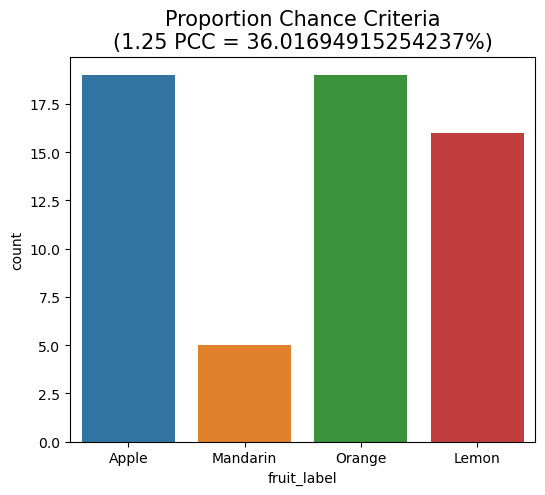

In [15]:
def PCC(target, plot=True, title=None):
    
    state_counts = Counter(fruit['fruit_label'])
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')
    num = (df_state[0]/df_state[0].sum())**2
    ret = 1.25*100*num.sum()
    
    if plot == True:
        plt.figure(figsize=(6,5))
        ax = sns.countplot(x=target)
        plt.title(f"{title}\n(1.25 PCC = {ret}%)", fontsize=15)
        plt.xticks(ticks=range(4), labels=['Apple', 'Mandarin', 'Orange', 'Lemon'])
        plt.show()
        
PCC(y, title="Proportion Chance Criteria")

### A. Logistic Regression with L2 Regularization

In [18]:
logisticregression = LogisticRegression(C=10).fit(X_train, y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.772727
test set score: 0.733333


In [19]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
logisticregression10 = LogisticRegression(C=10).fit(X_train, y_train)
logisticregression1 = LogisticRegression(C=1).fit(X_train, y_train)
logisticregression01 = LogisticRegression(C=.01).fit(X_train, y_train)
logisticregression001 = LogisticRegression(C=.001).fit(X_train, y_train)

#print("C =10, training set score: %f" % logisticregression10.score(X_train, y_train))
print("C =.001, train set score: %f" % logisticregression001.score(X_train, y_train))
print("C =.001, test set score: %f \n" % logisticregression001.score(X_test, y_test))
print("C =.01, train set score: %f" % logisticregression01.score(X_train, y_train))
print("C =.01, test set score: %f \n" % logisticregression01.score(X_test, y_test))
print("C =1, train set score: %f" % logisticregression1.score(X_train, y_train))
print("C =1, test set score: %f \n" % logisticregression1.score(X_test, y_test))
print("C =10, train set score: %f" % logisticregression10.score(X_train, y_train))
print("C =10, test set score: %f \n" % logisticregression10.score(X_test, y_test))
print("C =100, train set score: %f" % logisticregression100.score(X_train, y_train))
print("C =100, test set score: %f" % logisticregression100.score(X_test, y_test))

C =.001, train set score: 0.340909
C =.001, test set score: 0.266667 

C =.01, train set score: 0.340909
C =.01, test set score: 0.266667 

C =1, train set score: 0.727273
C =1, test set score: 0.533333 

C =10, train set score: 0.772727
C =10, test set score: 0.733333 

C =100, train set score: 0.863636
C =100, test set score: 0.933333


Highest Test Set Achieved = 0.802299
Best C Parameter = 100.000000


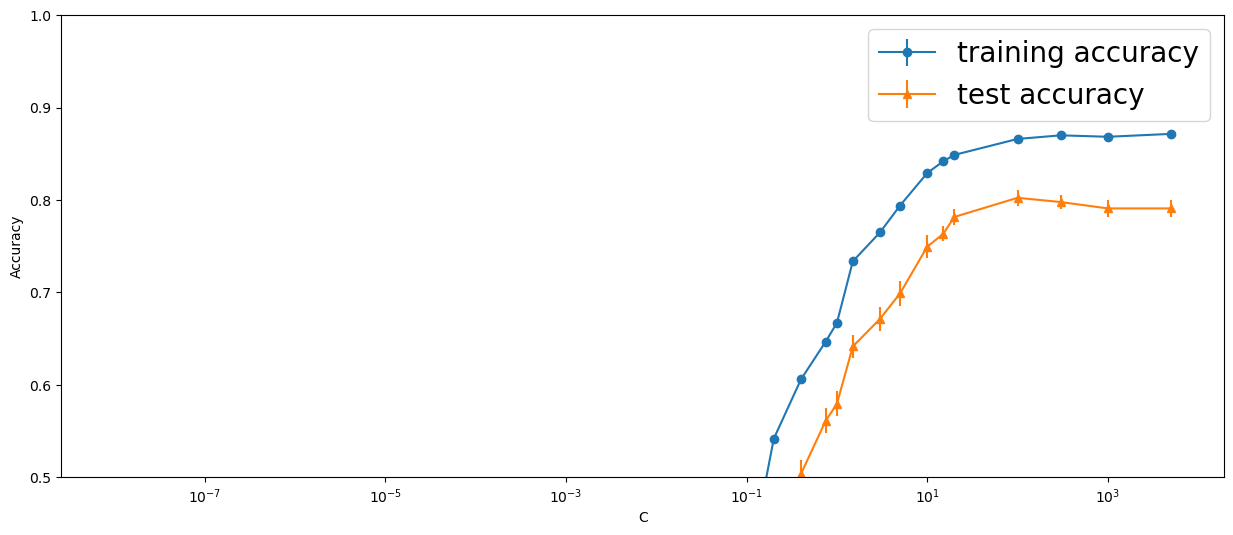

In [39]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []

    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        lr_l2 = LogisticRegression(C=alpha_run).fit(X_train, y_train)
        training_accuracy.append(lr_l2.score(X_train, y_train))
        test_accuracy.append(lr_l2.score(X_test, y_test))
    
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
    
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.50,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

### B. Logistic Regression with L1 Regularization

Highest Test Set Achieved = 0.774713
Best C Parameter = 300.000000


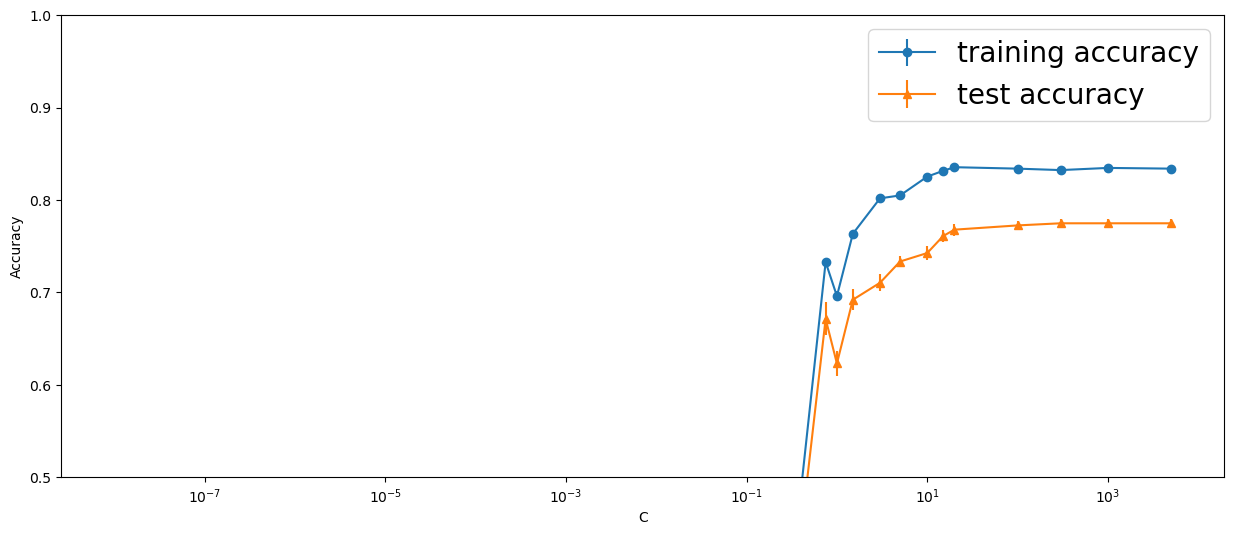

In [64]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y,
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []

    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        lr_l1 = LogisticRegression(C=alpha_run, penalty="l1", solver='liblinear').fit(X_train, y_train)
        training_accuracy.append(lr_l1.score(X_train, y_train))
        test_accuracy.append(lr_l1.score(X_test, y_test))
    
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
    
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.5,1)
plt.legend()
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

### C. Support Vector machine with linear kernel and L2 regularization

Highest Test Set Achieved = 0.760920
Best C Parameter = 100.000000


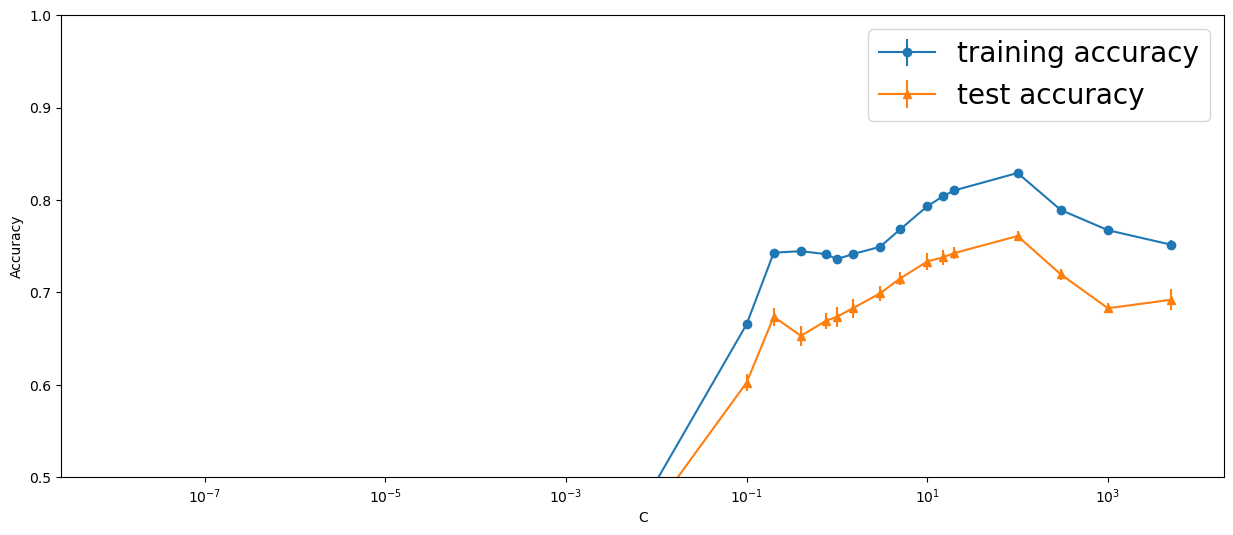

In [61]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y,
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []

    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        svm_l2 = LinearSVC(C=alpha_run, penalty="l2").fit(X_train, y_train)
        training_accuracy.append(svm_l2.score(X_train, y_train))
        test_accuracy.append(svm_l2.score(X_test, y_test))
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.5,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

### D. Support Vector machine with linear kernel and L1 regularization

Highest Test Set Achieved = 0.760920
Best C Parameter = 300.000000


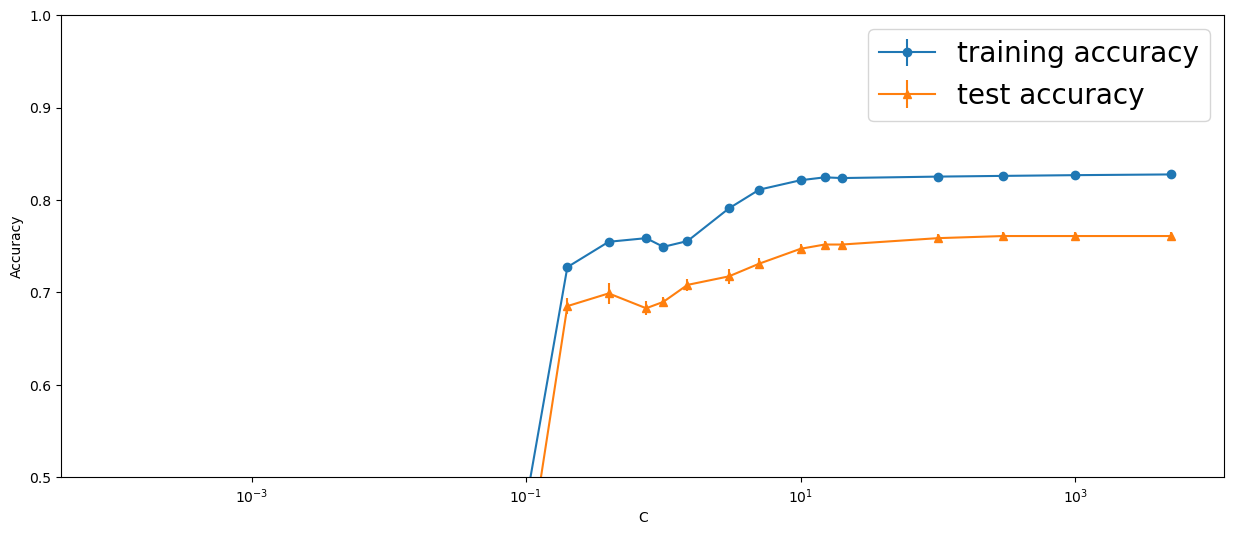

In [63]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y,
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []

    C = [1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        svm_l1 = LinearSVC(C=alpha_run, penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)
        training_accuracy.append(svm_l1.score(X_train, y_train))
        test_accuracy.append(svm_l1.score(X_test, y_test))
    
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
    
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.5,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

## Summary Table


|Machine Learning Method| Test Accuracy | Optimal Parameter | 
| :---: | :---: | :----: |
| kNN | 100.00% | n_neighbor = 1| 
| Logistic (L2) | 80.22% |C=100|
| Logistic (L1) |77.47% | C=300 |
| Linear SVM (L2) |76.09% | C=100 |
| Linear SVM(L1) | 76.09%| C=300 |



The summary presents the performance evaluation of different machine learning methods on the dataset. kNN demonstrates remarkable accuracy, achieving 100.00% with a single neighbor. Among logistic regression models, L2 regularization attains the highest accuracy at 80.22% with an optimal parameter of C = 100, while L1 regularization yields a slightly lower accuracy of 77.47% with C = 300. Linear Support Vector Machines (SVM) with both L2 and L1 regularization exhibit comparable accuracies of 76.09%, with optimal parameters C = 100 and C = 300 respectively. These findings underline the effectiveness of kNN for this dataset, while highlighting the competitive performance of logistic regression and linear SVM models, with the choice of regularization influencing their accuracy.